In [10]:
import os
os.chdir('/Users/asherlantz/Desktop/physics/FairSampling')

import numpy as np
from numpy import linalg

from database.models import InstancesN8, InstancesN12
import data_service

In [6]:
def hamming_distance(i,j,N):
    arr_i = np.array([int(s) for s in bin(i)[2:].zfill(N)])
    arr_j = np.array([int(s) for s in bin(j)[2:].zfill(N)])
    return int(np.sum(arr_i != arr_j))

def var_magnetization(hamming_row: np.ndarray, deg: int):

    

    return (4/deg) ( )


In [173]:


N = 16



Instance = data_service.get_instance_class(N)

with data_service.get_session() as session:

    instances: list[InstancesN8 | InstancesN12] = (
        session.query(Instance).where(Instance.degeneracy > 2).all()
    )

    PA_DM_array = []
    FS_DM_array = []
    FS_overlap_variance = []
    PA_overlap_variance = []

    for instance in instances:
        gs_array = instance.reduced_gs

        deg = instance.degeneracy // 2

        H = np.zeros((deg, deg))
        P = np.zeros((deg,deg))
        for i in range(deg):
            for j in range(i+1, deg):
                H[i][j] = H[j][i] = hamming_distance(gs_array[i], gs_array[j], N)
                P[i][j] = instance.post_anneal_gs_probs[j]
                P[j][i] = instance.post_anneal_gs_probs[i]


        FS_overlap_variance.append(instance.od_variance)
        PA_overlap_variance.append(instance.post_anneal_od_variance)
        PA_DM_array.append(max(4 * (linalg.norm(H*np.sqrt(P), axis = 1) **2 -  np.sum(H*P, axis=1) ** 2)) / (N))
        FS_DM_array.append(max((4/deg) * ( (linalg.norm(H, axis=1))**2 - (1/deg)* (np.sum(H, axis=1))**2)) / (N))


print(PA_DM_array)
print(FS_DM_array)

[0.23439911858816964, 0.2460437936021017, 0.24984039780676864, 0.24330322504114893, 0.0001977126231285098, 0.2361378608633558, 0.0006595173635108864, 0.2376034850963703, 0.519090555651391, 0.2498405617225254, 0.24791719000362455, 0.3729968409078459, 0.24957187830329058, 0.22636758821402359, 0.24659017841561087, 0.6337397347781653, 0.23384015929376856, 0.0003720998595286851, 0.24235447937724286, 0.22197393914815605, 0.0010697431489816722, 0.24745374953645816, 0.2499999952116392, 0.0006338893671546941, 0.23810348013553018, 0.0003737229150311272, 0.2323969266688009, 0.24235469642287388, 0.24235619519193985, 0.2517323845647379, 0.3237621448409329, 0.24401089847655805, 0.0002636364747261588, 0.250690641400622, 0.24465622680920163, 0.24235445727893068, 0.24310893968114305, 0.24984039557725507, 0.000293133674313939, 0.00018568833585064226, 0.7742306889400452, 0.00035949597218598583, 0.23065091986982283, 0.24984063527075528, 0.22420919755537028, 0.39281890181109835, 0.2347142940978202, 0.36206

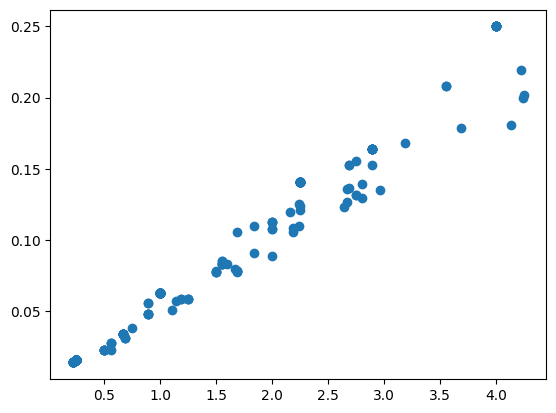

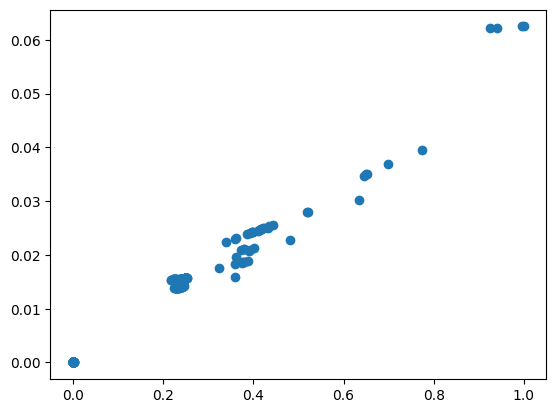

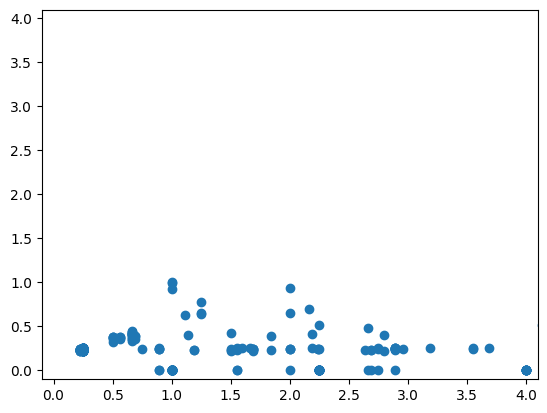

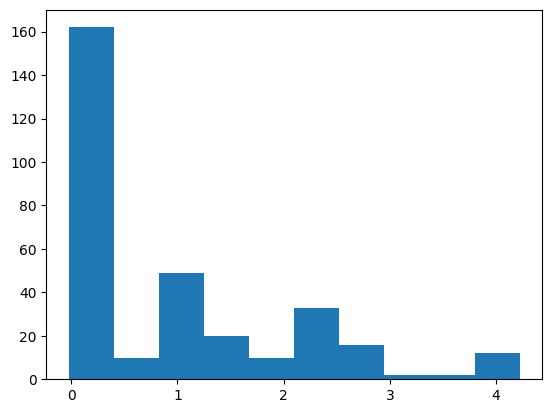

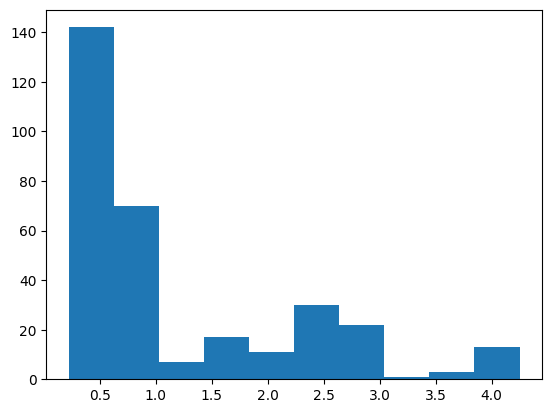

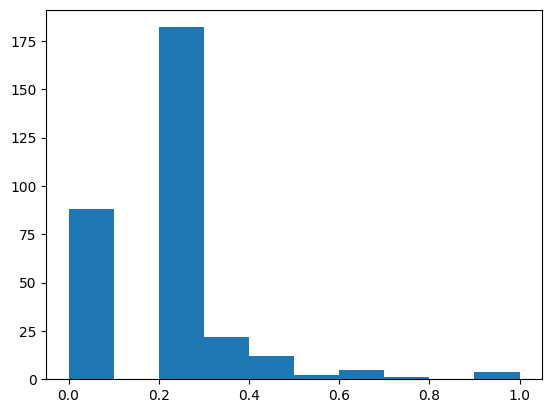

In [176]:
import matplotlib.pyplot as plt

plt.scatter(FS_DM_array, FS_overlap_variance )
plt.show()

plt.scatter(PA_DM_array, PA_overlap_variance )
plt.show()

plt.scatter(FS_DM_array, PA_DM_array )
plt.xlim(-0.1,4.1)
plt.ylim(-0.1,4.1)

plt.show()

plt.hist(np.array(FS_DM_array) - np.array(PA_DM_array))

plt.show()

plt.hist(np.array(FS_DM_array))

plt.show()

plt.hist(np.array(PA_DM_array))

plt.show()



In [74]:
32/9

3.5555555555555554

In [75]:
# spin -> state

N = 4
deg = 2**N
H = np.zeros((deg,deg))


for i in range(deg):
    for j in range(i+1, deg):
        H[i][j] = H[j][i] = hamming_distance(i,j,N)

print(H)

print(max((4/deg) * ( (linalg.norm(H, axis=1))**2 - (1/deg)* (np.sum(H, axis=1))**2)) / N)

[[0. 1. 1. 2. 1. 2. 2. 3. 1. 2. 2. 3. 2. 3. 3. 4.]
 [1. 0. 2. 1. 2. 1. 3. 2. 2. 1. 3. 2. 3. 2. 4. 3.]
 [1. 2. 0. 1. 2. 3. 1. 2. 2. 3. 1. 2. 3. 4. 2. 3.]
 [2. 1. 1. 0. 3. 2. 2. 1. 3. 2. 2. 1. 4. 3. 3. 2.]
 [1. 2. 2. 3. 0. 1. 1. 2. 2. 3. 3. 4. 1. 2. 2. 3.]
 [2. 1. 3. 2. 1. 0. 2. 1. 3. 2. 4. 3. 2. 1. 3. 2.]
 [2. 3. 1. 2. 1. 2. 0. 1. 3. 4. 2. 3. 2. 3. 1. 2.]
 [3. 2. 2. 1. 2. 1. 1. 0. 4. 3. 3. 2. 3. 2. 2. 1.]
 [1. 2. 2. 3. 2. 3. 3. 4. 0. 1. 1. 2. 1. 2. 2. 3.]
 [2. 1. 3. 2. 3. 2. 4. 3. 1. 0. 2. 1. 2. 1. 3. 2.]
 [2. 3. 1. 2. 3. 4. 2. 3. 1. 2. 0. 1. 2. 3. 1. 2.]
 [3. 2. 2. 1. 4. 3. 3. 2. 2. 1. 1. 0. 3. 2. 2. 1.]
 [2. 3. 3. 4. 1. 2. 2. 3. 1. 2. 2. 3. 0. 1. 1. 2.]
 [3. 2. 4. 3. 2. 1. 3. 2. 2. 1. 3. 2. 1. 0. 2. 1.]
 [3. 4. 2. 3. 2. 3. 1. 2. 2. 3. 1. 2. 1. 2. 0. 1.]
 [4. 3. 3. 2. 3. 2. 2. 1. 3. 2. 2. 1. 2. 1. 1. 0.]]
1.0000000000000009


In [118]:
# spin -> state

N = 8
deg = 2
H = np.array([[0,N], [N,0]])


print(H)

print(max((4/deg) * ( (linalg.norm(H, axis=1))**2 - (1/deg)* (np.sum(H, axis=1))**2)) / N)

[[0 8]
 [8 0]]
8.0


In [117]:
gs = np.array([ [1,1,1], [-1,-1,-1]])


M = np.array([-1,-1,-1])

exp_M = np.sum(M*gs)/(len(gs))

print(exp_M)

delta_M = np.sum((np.sum(M*gs,axis=1) - exp_M)**2)/len(gs)

print(delta_M)




0.0
9.0


7.111111111111111

3.5555555555555554

In [172]:


N = 12



Instance = data_service.get_instance_class(N)

with data_service.get_session() as session:

    instances: list[InstancesN8 | InstancesN12] = (
        session.query(Instance).where(Instance.seed == 323).all()
    )

    PA_DM_array = []
    FS_DM_array = []

    for instance in instances:
        gs_array = instance.reduced_gs

        deg = instance.degeneracy // 2

        H = np.zeros((2**N, deg))
        # P = np.zeros((2**N,2**N))
        for i in range(2**N):
            for j in range(deg):
                H[i][j] = hamming_distance(i, gs_array[j], N)
                # P[i][j] = instance.post_anneal_gs_probs[j]
                # P[j][i] = instance.post_anneal_gs_probs[i]


        # PA_DM_array.append(max(4 * (linalg.norm(H*np.sqrt(P), axis = 1) **2 -  np.sum(H*P, axis=1) ** 2)) / N)
        qfi_array = (4/deg) * ( (linalg.norm(H, axis=1))**2 - (1/deg)* (np.sum(H, axis=1))**2)


for Mi, qfi in enumerate(qfi_array):
    if round(qfi,1) == 16:
        max_hd = max([hamming_distance(Mi,gs, N) for gs in gs_array])
        min_hd = min([hamming_distance(Mi,gs, N) for gs in gs_array])
        if max_hd != N and min_hd != 0:
            print([int(bit) for bit in bin(Mi)[2:].zfill(N)])
            print([[int(bit) for bit in bin(g)[2:].zfill(N)] for g in gs_array])
            print("Mi", Mi)
            print("max_hd", max_hd)
            print("min_hd", min_hd)
            print("qfi", qfi)


# [print(i,qfi) for i,qfi in enumerate(qfi_array)]
# Mi = np.argmax(np.array(qfi_array))
# print(Mi)

# gs_hds = [hamming_distance(Mi,gs, N) for gs in gs_array]
# print(gs_hds)
# print()

# print([int(bit) for bit in bin(Mi)[2:].zfill(N)])
# print([[int(bit) for bit in bin(g)[2:].zfill(N)] for g in gs_array])

# 0

# print(PA_DM_array)
# print(FS_DM_array)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]]
Mi 0
max_hd 8
min_hd 4
qfi 16.00000000000003
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]]
Mi 4
max_hd 7
min_hd 3
qfi 16.000000000000014
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]]
Mi 8
max_hd 9
min_hd 5
qfi 16.00000000000003
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
[[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]]
Mi 12
max_hd 8
min_hd 4
qfi 16.00000000000003
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]]
Mi 32
max_hd 7
min_hd 3
qfi 16.000000000000014
[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0], [0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1]]
Mi 36
max_hd 6
min_hd 2
qfi 16.000000000000014
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
[[0

In [150]:


N = 3









gs_array = [0,3,5]

deg = 3

H = np.zeros((2**N, deg))
# P = np.zeros((2**N,2**N))
for i in range(2**N):
    for j in range(deg):
        H[i][j] = hamming_distance(i, gs_array[j], N)
        # P[i][j] = instance.post_anneal_gs_probs[j]
        # P[j][i] = instance.post_anneal_gs_probs[i]


# PA_DM_array.append(max(4 * (linalg.norm(H*np.sqrt(P), axis = 1) **2 -  np.sum(H*P, axis=1) ** 2)) / N)
qfi_array = (4/deg) * ( (linalg.norm(H, axis=1))**2 - (1/deg)* (np.sum(H, axis=1))**2)


for Mi, qfi in enumerate(qfi_array):
    max_hd = max([hamming_distance(Mi,gs, N) for gs in gs_array])
    min_hd = min([hamming_distance(Mi,gs, N) for gs in gs_array])
    if max_hd != N and min_hd != 0:
        print([int(bit) for bit in bin(Mi)[2:].zfill(N)])
        print([[int(bit) for bit in bin(g)[2:].zfill(N)] for g in gs_array])
        print(Mi)
        print(max_hd)
        print(qfi)


# [print(i,qfi) for i,qfi in enumerate(qfi_array)]
# Mi = np.argmax(np.array(qfi_array))
# print(Mi)

# gs_hds = [hamming_distance(Mi,gs, N) for gs in gs_array]
# print(gs_hds)
# print()

# print([int(bit) for bit in bin(Mi)[2:].zfill(N)])
# print([[int(bit) for bit in bin(g)[2:].zfill(N)] for g in gs_array])

# 0

# print(PA_DM_array)
# print(FS_DM_array)

[0, 0, 1]
[[0, 0, 0], [0, 1, 1], [1, 0, 1]]
1
1
-5.921189464667501e-16
[1, 1, 0]
[[0, 0, 0], [0, 1, 1], [1, 0, 1]]
6
2
-2.3684757858670005e-15
